<a href="https://colab.research.google.com/github/mini-u/BasicDL/blob/main/%5B2023_11_02_%EC%98%A4%ED%9B%84_4_00_40%5D_0_%EC%9C%A0%EC%84%B1%EB%AF%BC_%EC%8B%A4%EC%8A%B5%EB%A6%AC%ED%8F%AC%ED%8A%B87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습리포트7



*   이름: 유성민
*   학과: 생명환경공학전공
*   학번: 2019110881

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense


### Iris 분류 문제

- 문제: Setosa, Virginica, Versicolor 3가지 종류를 분류하기

- 실행결과: 생성한 모델에 test 데이터셋을 입력한 결과 3가지 종류의 붓꽃을 분류하는 모델의 오차는 0.13, 정확도는 0.97로 상당히 높은 정확도를 보인다.

In [ ]:
#데이터셋 로드

from sklearn.datasets import load_iris
data=load_iris()

print(data.keys())
print(data.feature_names)
print(data.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
#x, y값

x=data.data
y=data.target

print(x.shape)
print(x[0:5,:])
print(y.shape)
print(y[0:5])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150,)
[0 0 0 0 0]


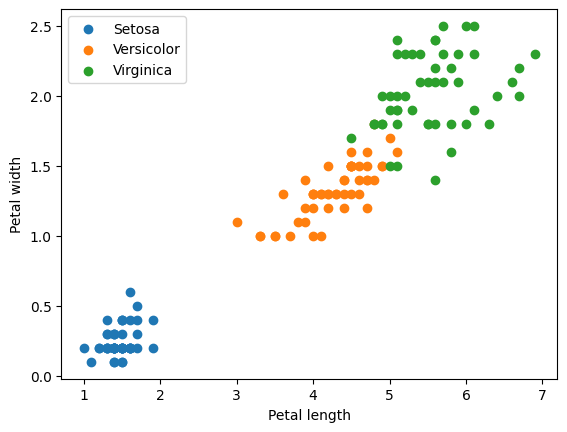

In [ ]:
#데이터 생성

x0 = x[y==0]
x1 = x[y==1]
x2 = x[y==2]

plt.scatter(x0[:,2],x0[:,3], label='Setosa')
plt.scatter(x1[:,2],x1[:,3], label='Versicolor')
plt.scatter(x2[:,2],x2[:,3], label='Virginica')
plt.legend()
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [ ]:
#훈련데이터, 테스트데이터 분리

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [ ]:
#one hot encoding

y_train=tf.one_hot(y_train, 3)
y_test=tf.one_hot(y_test,3)

print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)


In [ ]:
# 모델정의

model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#모델 컴파일

model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#모델 훈련

history=model.fit(x_train, y_train, validation_data=(x_test, y_test),
                  epochs=300, verbose=1)

Epoch 1/300
4/4 [==============================] - 2s 191ms/step - loss: 1.0852 - acc: 0.3333 - val_loss: 1.0784 - val_acc: 0.3333
Epoch 2/300
4/4 [==============================] - 0s 37ms/step - loss: 1.0662 - acc: 0.3333 - val_loss: 1.0646 - val_acc: 0.3333
Epoch 3/300
4/4 [==============================] - 0s 20ms/step - loss: 1.0531 - acc: 0.3333 - val_loss: 1.0526 - val_acc: 0.3333
Epoch 4/300
4/4 [==============================] - 0s 16ms/step - loss: 1.0407 - acc: 0.3333 - val_loss: 1.0419 - val_acc: 0.3333
Epoch 5/300
4/4 [==============================] - 0s 16ms/step - loss: 1.0299 - acc: 0.3333 - val_loss: 1.0307 - val_acc: 0.3333
Epoch 6/300
4/4 [==============================] - 0s 25ms/step - loss: 1.0194 - acc: 0.3333 - val_loss: 1.0190 - val_acc: 0.3333
Epoch 7/300
4/4 [==============================] - 0s 22ms/step - loss: 1.0071 - acc: 0.3333 - val_loss: 1.0071 - val_acc: 0.3333
Epoch 8/300
4/4 [==============================] - 0s 32ms/step - loss: 0.9949 - acc: 0.3

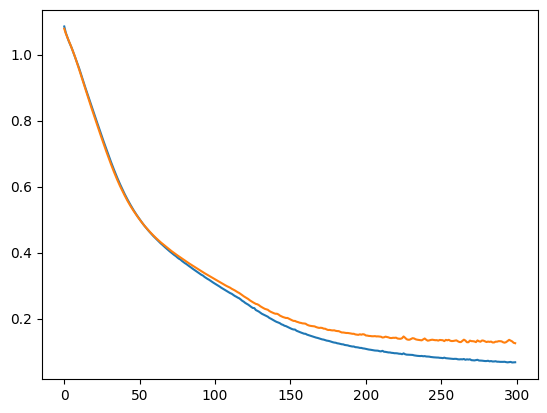

In [ ]:
#train loss, validation loss

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.show()

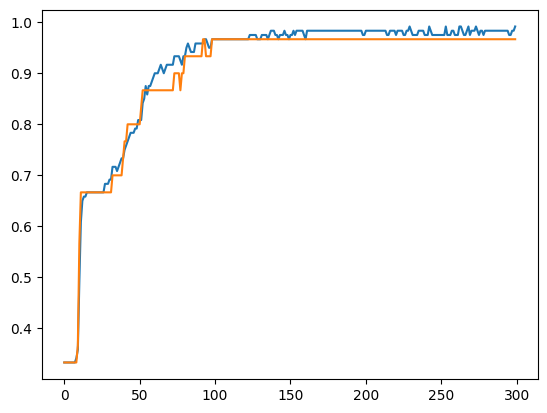

In [ ]:
#train accuarcy & validation accurarcy

acc=history.history['acc']
val_acc=history.history['val_acc']

plt.plot(acc)
plt.plot(val_acc)
plt.show()

In [ ]:
score = model.evaluate(x_train, y_train)

print("train_loss:", score[0])
print("train_acc:", score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.0669 - acc: 0.9917
train_loss: 0.06687793880701065
train_acc: 0.9916666746139526


In [ ]:
score2 = model.evaluate(x_test, y_test)

print("test_loss:", score2[0])
print("test_acc:", score2[1])

1/1 [==============================] - 0s 24ms/step - loss: 0.1253 - acc: 0.9667
test_loss: 0.1253177374601364
test_acc: 0.9666666388511658
